<a href="https://colab.research.google.com/github/gerardolml/Analisis_de_Covid-_19/blob/master/Luis_Ayala_4_3_6_Pr%C3%A1ctica_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 2
## Redes Neuronales Convolucionales

**Planteamiento del Problema:**

Se desea contruir un clasificador de prendas utilizando Redes Neuronales Convolucionales y Tensorflow para realizar un análisis de tiempos de producción durante un proceso de manufactura para una maquiladora.


**Instrucciones**

1.- Cargue el conjunto de datos Fashion MNIST (precargado en keras) y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Aplique las transformaciones que considere necesarias a los datos con el objetivo de maximizar el accuracy. **(2pts)**

2.- Defina una arquitectura basada en redes neuronales convolucionales con el uso de TF2. El diseño debe considerar un mínimo de 10 capas en total, entre ellas deben definirse al menos una capa convolucional, una capa pooling y una capa fully connected. Strides, padding, dimensión del kernel y la cantidad de filtros deben ser definidos de forma explícita.**(5pts)**

Ejemplo de arquitectura válida: CONV -> MAXPOOL -> CONV -> AVGPOOL -> CONV -> CONV -> MAXPOOL -> FLATTEN -> DENSE -> DENSE

3.- Justifique las dimensiones para cada tensor y la cantidad de paramétros en cada capa dados por su diseño de arquitectura. Apóyese del método `summary()` de Tensorflow. **(8pts)**

4.- Entrene, optimice, evalúe y diagnostique el modelo proponiendo siguientes pasos para mejorarlo.**(5pts)**

#### Conjunto de Datos

**Fashion MNIST (Retail)**

El conjunto de datos se encuentra disponible en TF2-Keras.

Este conjunto de datos incluye 10 etiquetas de diferentes prendas de vestir con imágenes de 28 x 28 *en escala de grises*. El conjunto de entrenamiento cuenta con 60,000 imágenes y el conjunto de prueba cuenta con 10,000 imágenes.

Descripción de las etiquetas (variable objetivo):

    Label	Description
    0	    T-shirt/top
    1	    Trouser
    2	    Pullover
    3	    Dress
    4	    Coat
    5	    Sandal
    6	    Shirt
    7	    Sneaker
    8	    Bag
    9	    Ankle boot
    


#### 1.- Cargue el conjunto de datos Fashion MNIST (precargado en keras) y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento de los datos. Aplique las transformaciones que considere necesarias a los datos con el objetivo de maximizar el accuracy. **(2pts)**

In [1]:
from tensorflow.keras.datasets import fashion_mnist

In [2]:
names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [3]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [8]:
import matplotlib.pyplot as plt

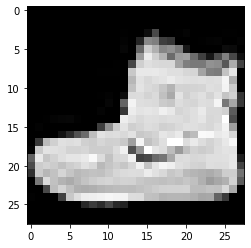

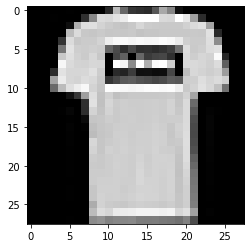

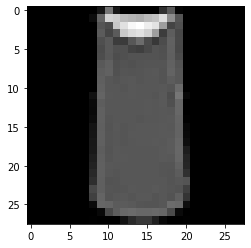

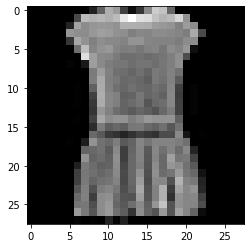

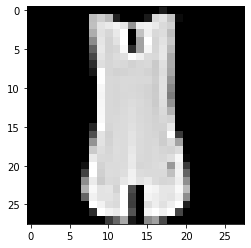

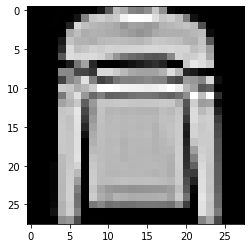

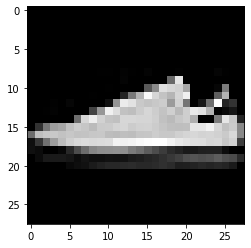

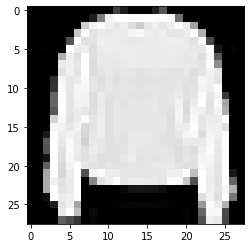

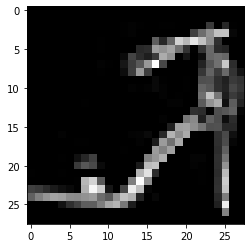

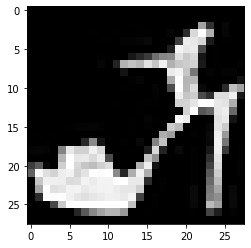

In [9]:
for i in range(0,10):
  plt.imshow(X_train[i], cmap='gray');
  plt.show()

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [12]:
single_image = X_train[0]

In [13]:
single_image.min(), single_image.max()

(0, 255)

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
scaled_single_ = X_train[0]

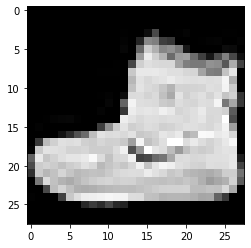

In [16]:
plt.imshow(scaled_single_, cmap='gray');

In [17]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test =X_test.reshape(10000, 28, 28, 1)

#### 2.- Defina una arquitectura basada en redes neuronales convolucionales con el uso de TF2. El diseño debe considerar un mínimo de 9 capas ocultas, entre ellas deben definirse al menos una capa convolucional, una capa pooling y una capa fully connected.**(4pts)**

Ej: CONV -> MAXPOOL -> CONV -> AVGPOOL -> CONV -> CONV -> MAXPOOL -> FLATTEN -> DENSE -> DENSE

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [19]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1),padding="same" ,activation='relu'))
model.add(Conv2D(32,(3,3),padding="valid", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(13,(3,3), padding="valid", activation='relu'))
model.add(Conv2D(20,(3,3), padding="valid", activation='relu'))
model.add(MaxPool2D(pool_size=2))
model.add(Conv2D(25,(2,2), padding="valid", activation='relu'))
model.add(MaxPool2D(pool_size=1))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### 3.- Justifique la cantidad de paramétros dados por su diseño de arquitectura. **(10pts)**


In [20]:
from tensorflow.keras.utils import plot_model

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 13)        3757      
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 20)          2360      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 20)         0         
 2D)                                                    

# CONV2D_0
 #Param 320=32(3*3*1+1)

# CONV2D_1
 #Paran 9248=32(3*3*32+1)

# CONV2D_2
 #Paran 3757=13(3*3*32+1)

# CONV2D_3
 #Paran 2360=20(3*3*13+1)

# CONV2D_4
 #Paran 2360=25(2*2*20+1)

# dense_0
  #Paran 28928=128(225+1)

# dense_1
  #Paran 1290=10(128+1)

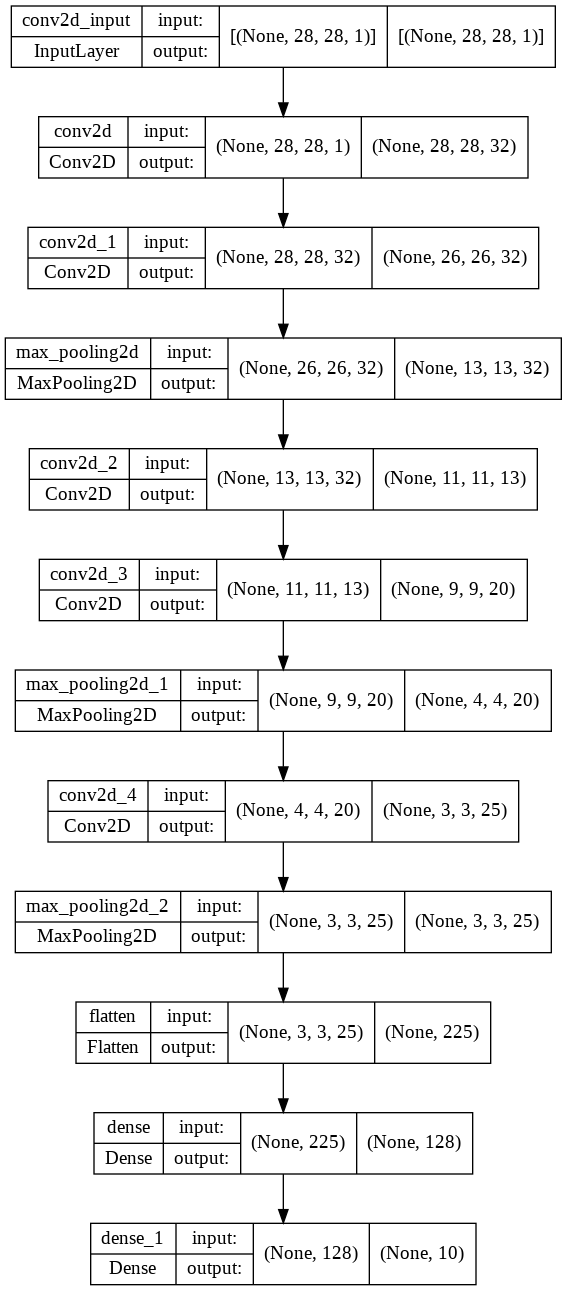

In [22]:
plot_model(model, show_shapes=True)

#### 4.- Entrene, optimice, evalúe y diagnostique el modelo proponiendo siguientes pasos para mejorarlo.**(4pts)**

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [25]:
%%time
model.fit(X_train, y_cat_train, epochs=10, validation_data=(X_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 11ms/step - loss: 0.5543 - accuracy: 0.7953 - val_loss: 0.4083 - val_accuracy: 0.8544
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3550 - accuracy: 0.8703 - val_loss: 0.3414 - val_accuracy: 0.8776
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.3068 - accuracy: 0.8870 - val_loss: 0.3228 - val_accuracy: 0.8818
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2754 - accuracy: 0.8981 - val_loss: 0.3079 - val_accuracy: 0.8912
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2538 - accuracy: 0.9056 - val_loss: 0.2802 - val_accuracy: 0.8993
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2364 - accuracy: 0.9128 - val_loss: 0.2722 - val_accuracy: 0.9038
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2240 - accuracy: 0.9173 - val_loss: 0.2693 -

In [26]:
import numpy as np
import pandas as pd

In [29]:
losses = pd.DataFrame(model.history.history)

In [31]:
print(model.metrics_names)
print(model.evaluate(X_test, y_cat_test, verbose=0))

['loss', 'accuracy']
[0.2647254467010498, 0.9070000052452087]


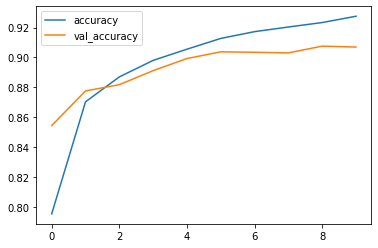

In [32]:
losses[['accuracy','val_accuracy']].plot();

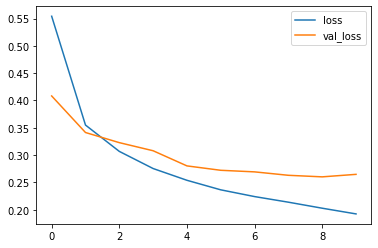

In [33]:
losses[['loss','val_loss']].plot();

In [34]:
from sklearn.metrics import classification_report ,plot_confusion_matrix, ConfusionMatrixDisplay, confusion_matrix

In [35]:
predictions_ = model.predict(X_test)
predictions = np.argmax(predictions_, axis=1)

In [36]:
y_test, predictions

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8), array([9, 2, 1, ..., 8, 1, 5]))

In [37]:
import seaborn as sns

In [38]:
confusion_matrix(y_test, predictions)

array([[875,   0,  16,  20,   0,   1,  84,   0,   4,   0],
       [  2, 969,   0,  23,   1,   0,   5,   0,   0,   0],
       [ 25,   0, 853,  12,  34,   0,  73,   0,   3,   0],
       [ 12,   0,   9, 944,  15,   0,  20,   0,   0,   0],
       [  4,   0,  40,  40, 797,   0, 119,   0,   0,   0],
       [  0,   0,   0,   0,   0, 978,   0,  19,   0,   3],
       [122,   0,  49,  36,  34,   0, 750,   0,   9,   0],
       [  0,   0,   0,   0,   0,   2,   0, 986,   0,  12],
       [ 10,   0,   4,   3,   1,   3,  10,   8, 960,   1],
       [  0,   0,   0,   0,   0,   6,   0,  36,   0, 958]])

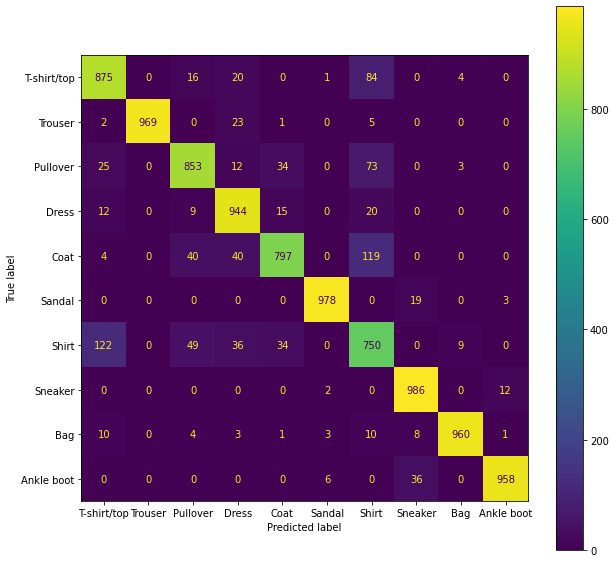

In [39]:
disp=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, predictions),display_labels=names)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax);

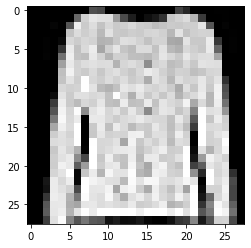

In [40]:
my_img = X_test[89]
my_img.shape
plt.imshow(my_img.reshape(28,28), cmap='gray');

In [41]:
names[np.argmax(model.predict(my_img.reshape(1, 28, 28, 1)))]

'Shirt'

In [95]:
def plot_clothing(model,X_test,y_cat_test,names):
  from tensorflow.python.ops.gen_array_ops import expand_dims
  from tensorflow.math import reduce_max
  plt.figure(figsize=(10,15))
  for i in range(12):
    ax=plt.subplot(4,3,i+1)
    rand_index=random.choice(range(len(X_test)))
    target_image=X_test[rand_index]
    pred_probs=model.predict(expand_dims(target_image,axis=0))
    pred_label=names[pred_probs.argmax()]
    true_label= names[list(y_cat_test[rand_index]).index(1)]
    plt.imshow(target_image.reshape(28,28),cmap='gray')
    if pred_label==true_label:
      color="green"
    else:
      color="red"
    plt.xlabel("Pred:{} {:2.0f}% \n(True:{})".format(pred_label,
                                              100*reduce_max(pred_probs),
                                              true_label),
                                              color=color, fontsize=13
                                              )
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    ax.tick_params(axis='both', which='both', length=0)


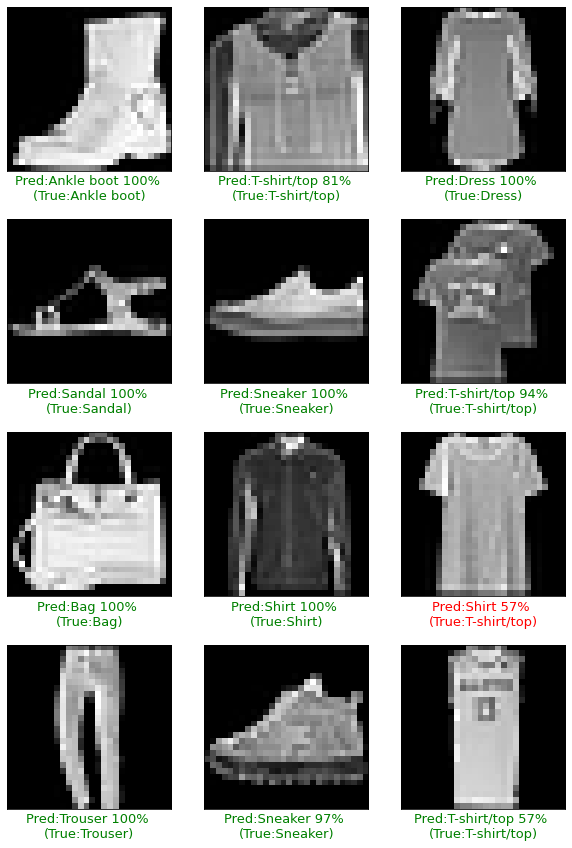

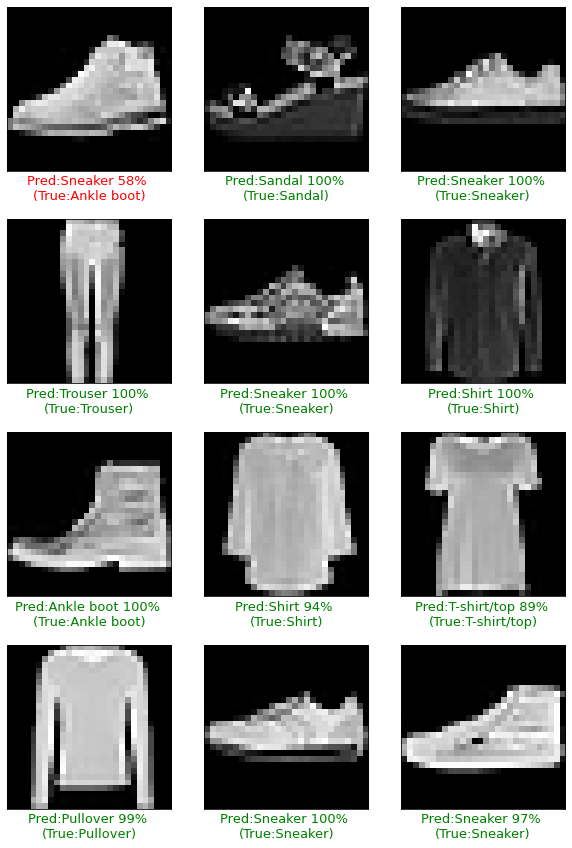

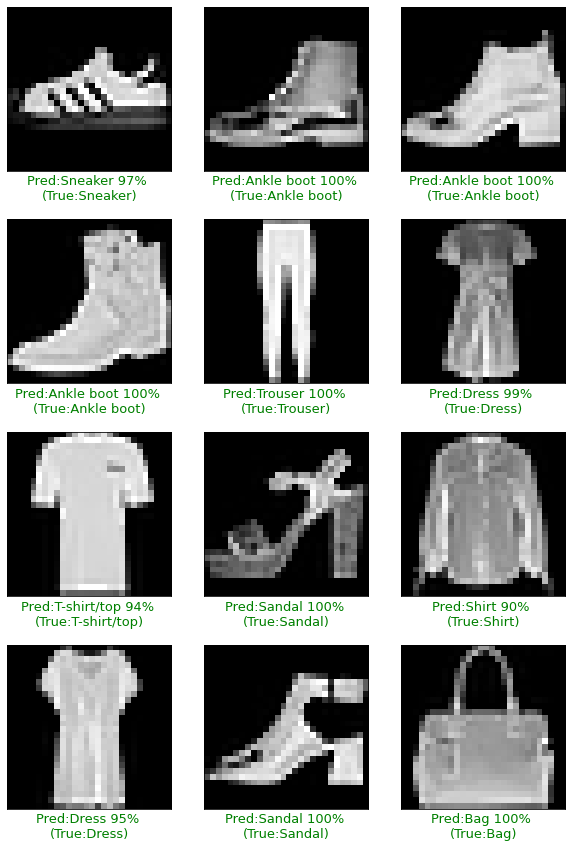

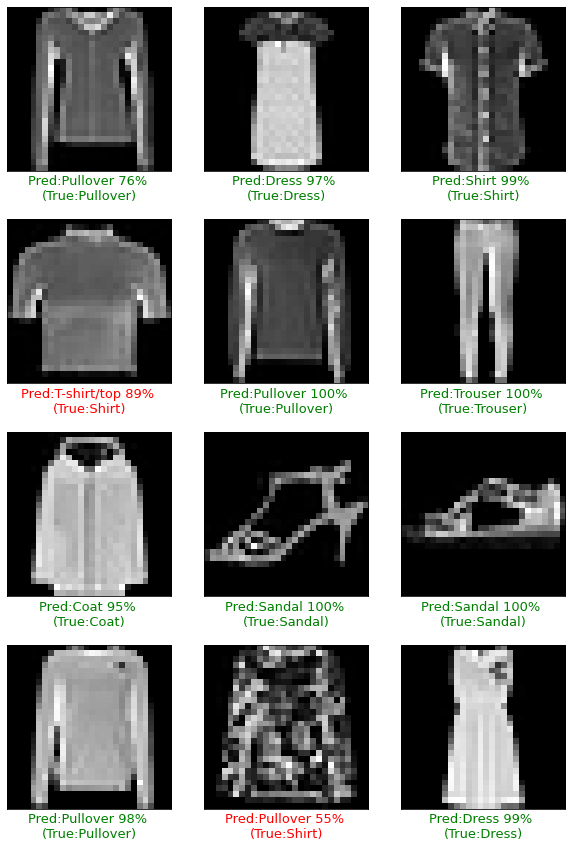

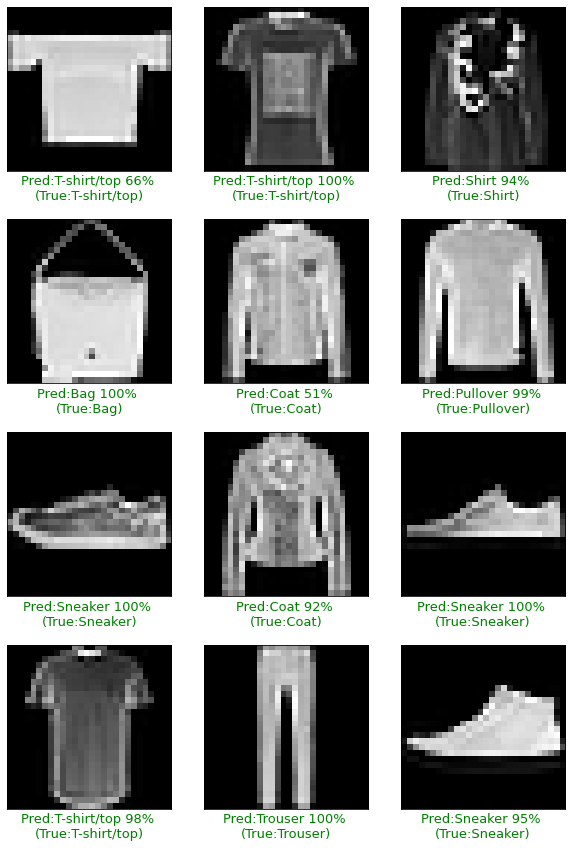

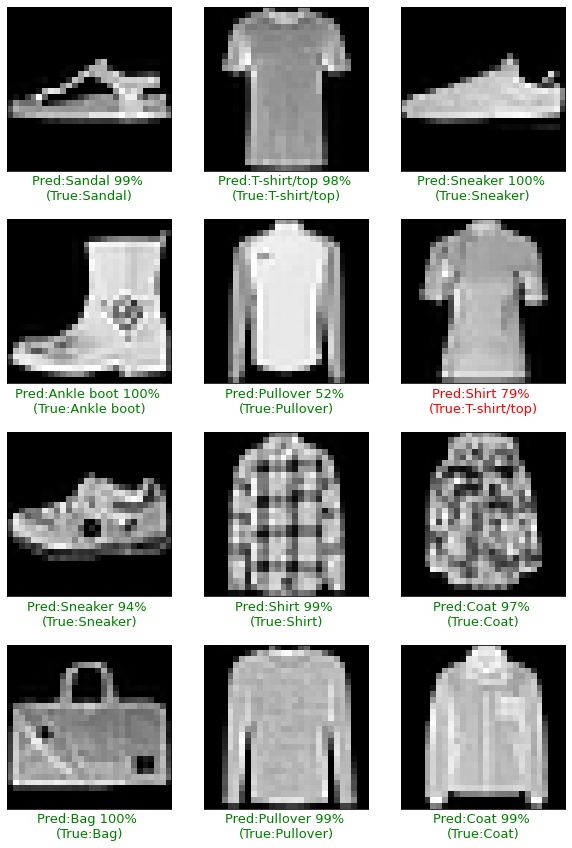

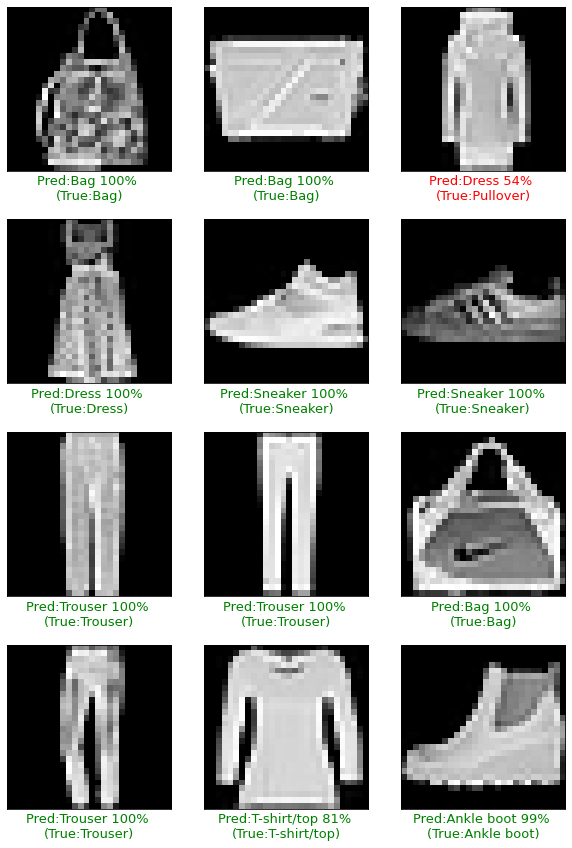

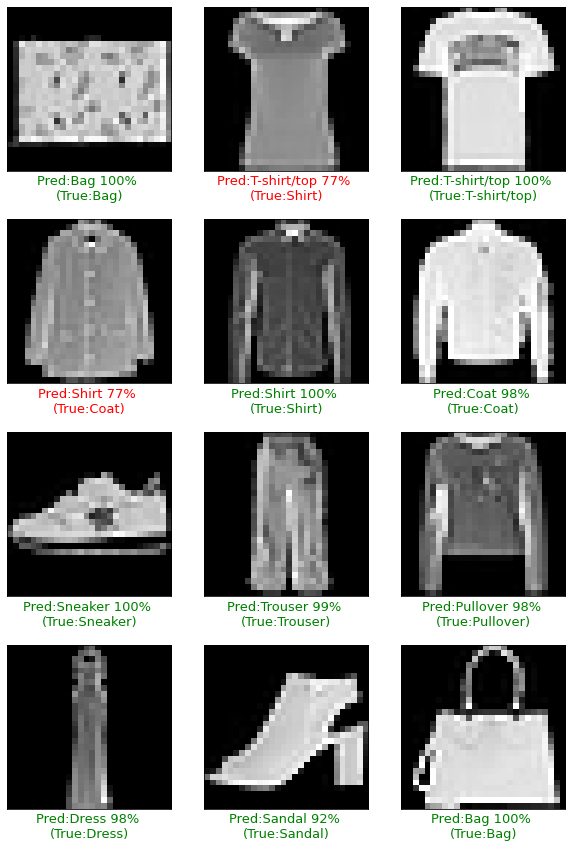

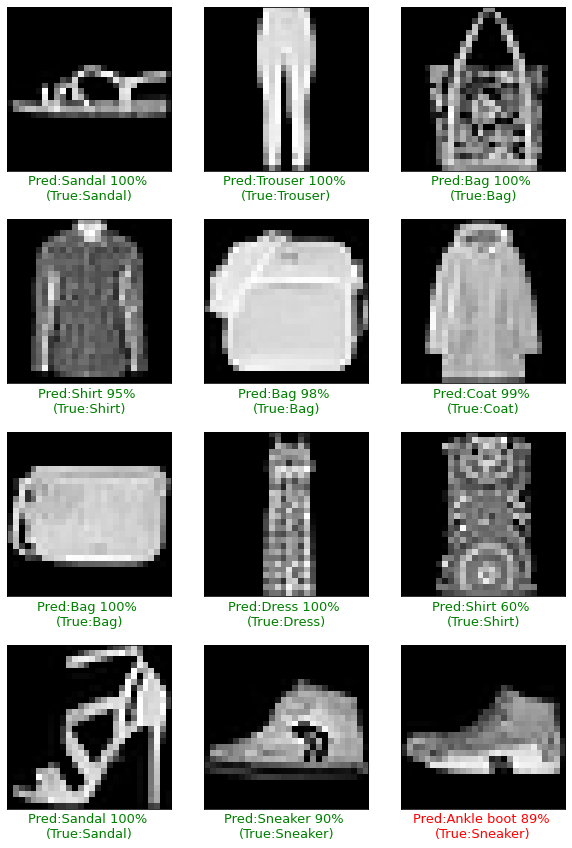

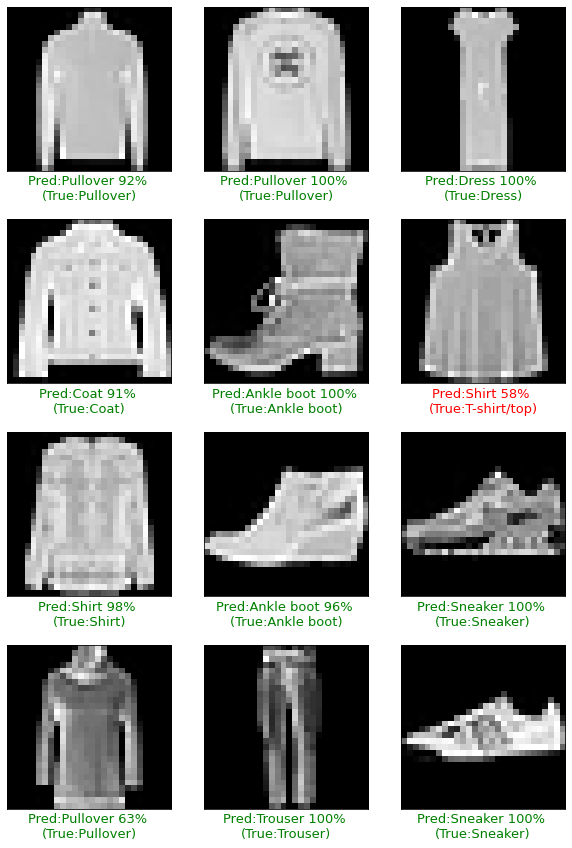

In [97]:
for i in range(10):
  plot_clothing(model,X_test,y_cat_test,names)

Vemos que el modelo tiende a condirse mucho  T-shirt/top con Shirt y Sneaker con Ankle boot, lo que podriamos hacer es mejorar la resolución y color del data set de entrenamiento, para que la red pueda apresiar las carecteristicas mas especificad de una Shirt(botones) y en caso de de los Sneaker que se vean detalles que van mas allá de la forma ya que hay Sneakers en forma de Ankle boot